In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

flowers_path = os.listdir('flowers-recognition/flowers')

flower_types = os.listdir('flowers-recognition/flowers')
print (flower_types)  #what kinds of flowers are in this dataset

print("Types of flowers found: ", len(flowers_path))



['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Types of flowers found:  5


In [27]:
import cv2
path = 'flowers-recognition/flowers/'


im_size = 60

images = []
labels = []

for i in flower_types:
    data_path = path + str(i)  # entered in daisy folder
    filenames = [i for i in os.listdir(data_path) if i.endswith('.jpg')]
    #print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
        

In [8]:
# Transform the image array to a numpy type

images = np.array(images)

images.shape

(8646, 60, 60, 3)

In [9]:
images = images.astype('float32') / 255.0


In [10]:
# Extract the labels

label_dummies = pd.get_dummies(labels)

labels =  label_dummies.values.argmax(1)
labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [11]:
pd.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:


# Convert the shuffled list to numpy array type

images = np.array(images)
labels = np.array(labels)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 0)

In [14]:
# Develop a sequential model using tensorflow keras
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


Using TensorFlow backend.
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [15]:
model =Sequential()
model.add(Flatten( input_shape=(60,60,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1382528   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 1,383,173
Trainable params: 1,383,173
Non-trainable params: 0
_________________________________________________________________


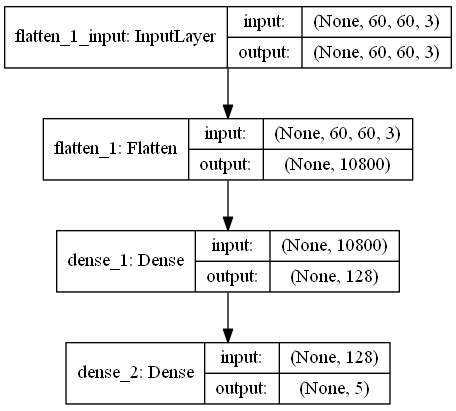

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
# Compute the model parameters

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
# Train the model  with 5 epochs 

#model.fit(X_train,y_train, epochs=5)
model.fit(X_train, y_train, batch_size = 32, epochs = 10,validation_data = (X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6916 samples, validate on 1730 samples
Epoch 1/10
6916/6916 [==============================] - 2s 277us/step - loss: 2.5512 - acc: 0.2597 - val_loss: 1.5463 - val_acc: 0.2382
Epoch 2/10
6916/6916 [==============================] - 2s 220us/step - loss: 1.5190 - acc: 0.2714 - val_loss: 1.5237 - val_acc: 0.3341
Epoch 3/10
6916/6916 [==============================] - 2s 239us/step - loss: 1.4664 - acc: 0.3250 - val_loss: 1.4438 - val_acc: 0.3277
Epoch 4/10
6916/6916 [==============================] - 2s 246us/step - loss: 1.4215 - acc: 0.3489 - val_loss: 1.4108 - val_acc: 0.3491
Epoch 5/10
6916/6916 [==============================] - 2s 254us/step - loss: 1.3168 - acc: 0.4237 - val_loss: 1.2940 - val_acc: 0.4445
Epoch 6/10
6916/6916 [==============================] - 2s 254us/step - loss: 1.2884 - acc: 0.4588 - val_loss: 1.2621 - val_acc: 0.4659
Epoch 7/10
6916/6916 [===================

In [20]:
y_pred = model.predict_classes(X_test)
y_pred

array([0, 3, 1, ..., 1, 1, 4], dtype=int64)

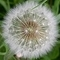

In [21]:

from PIL import Image
import numpy as np

test = Image.open("test1.jpg")
test



In [22]:
y_pred=model.predict(np.expand_dims(test, axis=0))
y_pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [23]:


#model.evaluate(): To calculate the loss values for input data.
#model.predict(): To generate network output for input data.
#model.predict_classes(): To generate class outputs for input data.
#model.predict_proba(): To generate class probabilities for input data.

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2283754933087123
Test accuracy: 0.48323699421965316


In [25]:
mp = "flower_model.h5"   # pip install h5py
model.save(mp)

c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\keras\engine\saving.py:135: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [26]:
from keras.models import load_model
model = load_model('flower_model.h5')
predicted = model.predict(np.expand_dims(test, axis=0))
predicted

c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\keras\engine\saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


array([[1., 0., 0., 0., 0.]], dtype=float32)